In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

## Parameters

In [2]:
batch_size_train = 10
batch_size_test = 100

train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(10, 10)

input_size = 784
encoding_dim = 128
learning_rate = 0.01
momentum = 0.5
log_interval = 10
n_epochs = 1

Loaded image shape in tensor: torch.Size([10, 1, 224, 224])


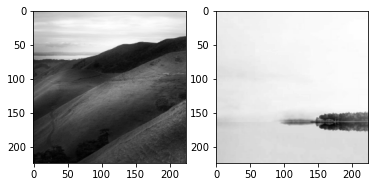

In [3]:
# get minibatch
x = next(iter(train_loader))
x_test  = next(iter(test_loader))
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray', "viridis"][0]);
img1 = x[0][0].numpy()#.transpose((1, 2, 0))
img2 = x_test[0][0].detach().numpy()#.transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [4]:
autoencoder = Autoencoder(224*224, 64)

Shape : torch.Size([10, 1, 224, 224])


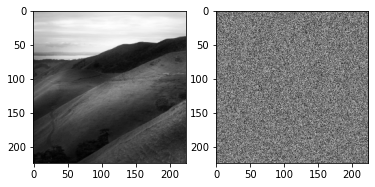

In [5]:
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0]);
axes[0].imshow(x[0][0].numpy()); 
reconstructed = autoencoder(x)
print(f"Shape : {reconstructed.shape}")
axes[1].imshow(reconstructed[0][0].detach().numpy())

In [6]:
%time train(autoencoder, trainloader=train_loader, valloader=test_loader, num_epochs=1)

Epoch 1/1
----------
train loss 0.692430
valid loss 0.687624

Wall time: 8min 1s


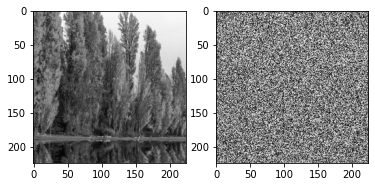

In [7]:
x = next(iter(test_loader))
#z = autoencoder(x)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(autoencoder(x)[0][0].detach().cpu())